### draw_meanstate
Calculate and visualize average quantities in the control simulation, for initializing box model

In [1]:
import xarray as xr
import bio_pump_timescales.esm2m as esm2m
import os
from dask.diagnostics import ProgressBar
import gfdl_utils as gu
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
outroot = '/work/gam/projects/bio-pump-timescales/data/esm2m/processed/global_integrals/spinup/'
ds = xr.Dataset()
ds['pco2_atm'] = xr.open_dataarray(outroot+'esm2m_pco2_atm.nc')/1e6
ds['intpp'] = xr.open_dataarray(outroot+'esm2m_jp_uptake_9999.nc')

In [3]:
rstd = ds['pco2_atm'].std()/ds['intpp'].std()

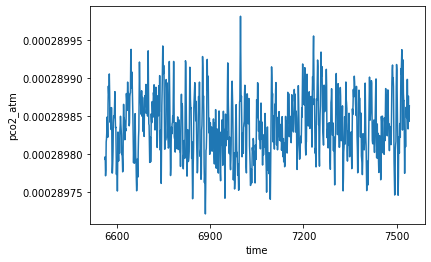

In [4]:
ds['pco2_atm'].coarsen({'time':12}).mean().plot()

In [23]:
### Define impulse response function
def power_law(x, a, b):
    return a*np.power(x, b)
tau = np.arange(30*12)*30
a = 1
b = -0.61
G1=np.zeros(len(tau))
G1[13:] = power_law(tau[13:],a,b)
G1[0:13] = np.linspace(0,G1[13],num=13)
a = 2.3
b = -0.73
G2=np.zeros(len(tau))
G2[13:] = power_law(tau[13:],a,b)
G2[0:13] = np.linspace(0,G2[13],num=13)

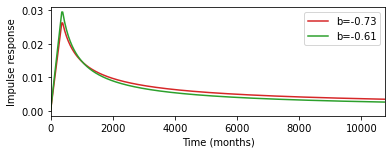

In [35]:
fig,ax = plt.subplots(figsize=(6,2))
ax.plot(tau,G1,color='tab:red',label='b=-0.73')
ax.plot(tau,G2,color='tab:green',label='b=-0.61')
ax.set_xlim([0,tau[-1]])
ax.legend()
ax.set_xlabel('Time (months)')
ax.set_ylabel('Impulse response')
fig.savefig('../../figures/esm2m/G.png',dpi=300)

In [30]:
# Define target and forcing
F = ds['intpp']
F = (F-F.mean())/F.std()
T = ds['pco2_atm']
T = (T-T.mean())/T.std()
cv = np.convolve(G1,F,mode='same')
T_r1 = T.copy(data=cv)/4
cv = np.convolve(G2,F,mode='same')
T_r2 = T.copy(data=cv)/4

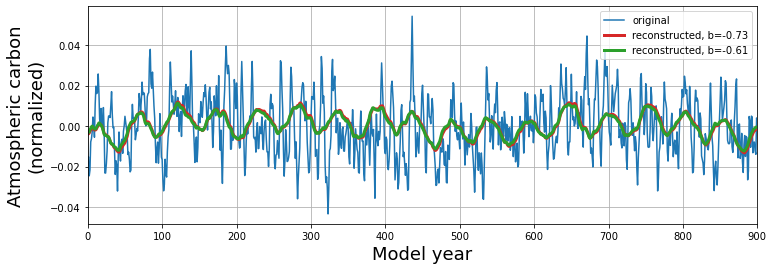

In [36]:
kwargs = {'linewidth':3}
fig,ax = plt.subplots(figsize = (12,4))
ax.plot(T.coarsen({'time':12}).mean(),label='original')
ax.plot(T_r1.coarsen({'time':12}).mean(),color='tab:red',label='reconstructed, b=-0.73',**kwargs)
ax.plot(T_r2.coarsen({'time':12}).mean(),color='tab:green',label='reconstructed, b=-0.61',**kwargs)
ax.grid()
ax.set_xlim([0,900])
ax.legend()
font_kwargs = {'fontsize':18}
ax.set_ylabel('Atmospheric carbon\n(normalized)',**font_kwargs)
ax.set_xlabel('Model year',**font_kwargs)
fig.savefig('../../figures/esm2m/reconstruction.png',dpi=300)

In [51]:
T

<xarray.DataArray 'pco2_atm' (time: 11760)>
array([-0.40088922,  0.21708608, -0.06814037, ...,  0.12840821,
       -1.2914604 , -1.361681  ], dtype=float32)
Coordinates:
  * time     (time) object 6561-01-16 12:00:00 ... 7540-12-16 12:00:00

In [45]:
ds['pco2_atm']

<xarray.DataArray 'pco2_atm' (time: 11760)>
array([288.77243, 290.4134 , 289.656  , ..., 290.17792, 286.40762, 286.22116],
      dtype=float32)
Coordinates:
  * time     (time) object 6561-01-16 12:00:00 ... 7540-12-16 12:00:00

In [44]:
r.shape

(11401,)

In [5]:
# Load dataset
ds = esm2m.load_exps(variable='*',ppname='ocean_bling_tracers',override=False,experiments='')

KeyboardInterrupt: 

### Convolution
Define impulse response function
